# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
from scipy.interpolate import splev, splrep 
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


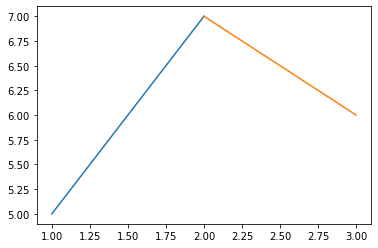

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


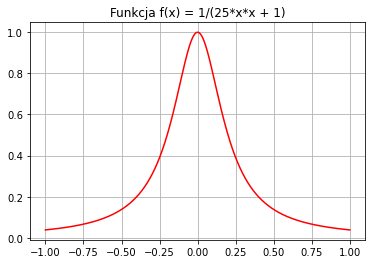

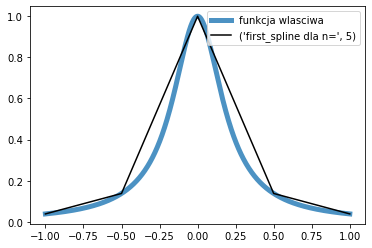

Maksymalny błąd interpolacji dla n=5(first_spline):<function L_inf at 0x0000019FE31161F0>.


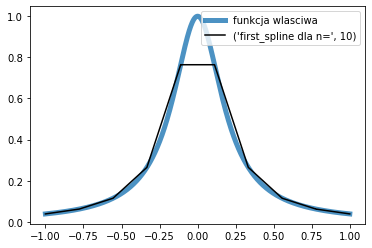

Maksymalny błąd interpolacji dla n=10(first_spline):<function L_inf at 0x0000019FE31161F0>.


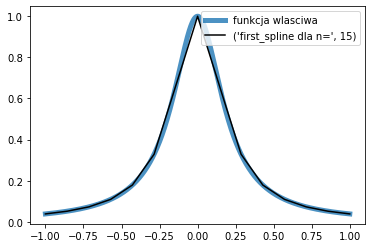

Maksymalny błąd interpolacji dla n=15(first_spline):<function L_inf at 0x0000019FE31161F0>.


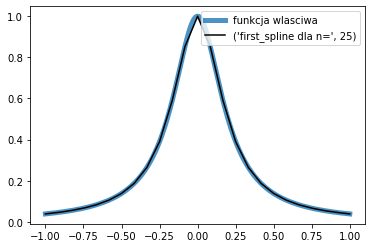

Maksymalny błąd interpolacji dla n=25(first_spline):<function L_inf at 0x0000019FE31161F0>.


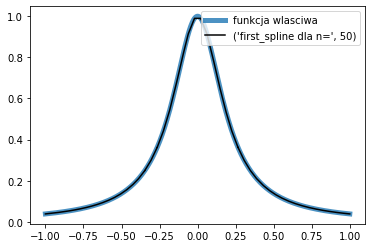

Maksymalny błąd interpolacji dla n=50(first_spline):<function L_inf at 0x0000019FE31161F0>.


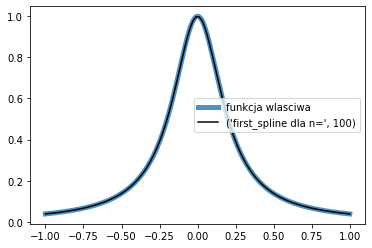

Maksymalny błąd interpolacji dla n=100(first_spline):<function L_inf at 0x0000019FE31161F0>.


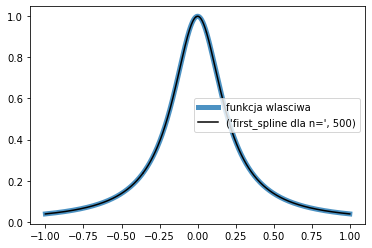

Maksymalny błąd interpolacji dla n=500(first_spline):<function L_inf at 0x0000019FE31161F0>.


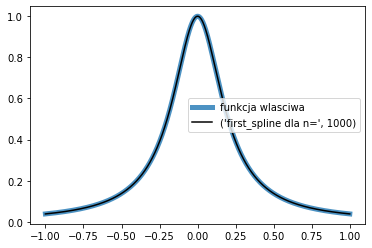

Maksymalny błąd interpolacji dla n=1000(first_spline):<function L_inf at 0x0000019FE31161F0>.


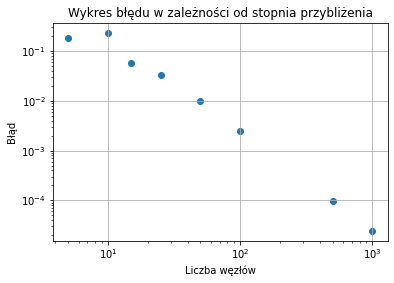

In [3]:

x = np.linspace(-1, 1, 10000)
f = lambda x: 1/(25*np.power(x,2) + 1)
y = f(x)
plt.plot(x, y,"r")
plt.grid()
plt.title("Funkcja f(x) = 1/(25*x*x + 1)")
plt.show()
#Interpolacja funkcji first_spline
#----------------------------------------------
wezly = ([5, 10, 15, 25, 50, 100, 500, 1000])
blad_inter = []
f = lambda x: 1/(25*x*x + 1)
for n in wezly:
    x = np.linspace(-1, 1, n)
    x1=np.linspace(-1,1,1000)
    a,b = main.first_spline(x, f(x))
    f1 = [[b[i],a[i]] for i in range(len(a))]
    x_a = y_a = np.array([])
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f1[i])
        y_a = np.append(y_a, y_new)
        x_a = np.append(x_a, x_new)
    blad_inter.append(main.L_inf(y_a, f(x_a)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(x_a, y_a,'black', label = ('first_spline dla n=' , n))
    plt.legend()
    plt.show() 
    print("Maksymalny błąd interpolacji dla n={b}(first_spline):{a}.".format(a=main.L_inf,b=n))
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()  
    

    


    

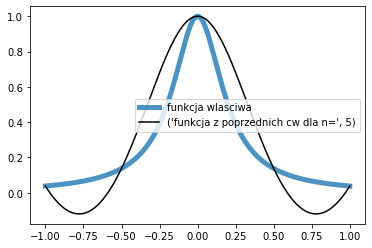

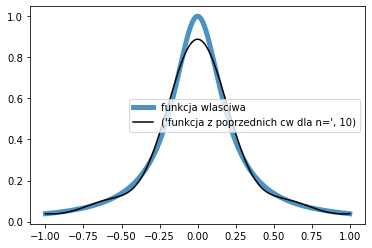

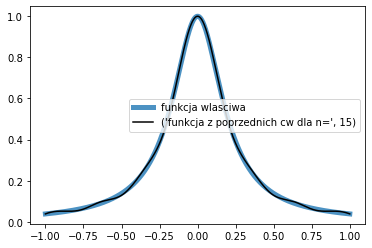

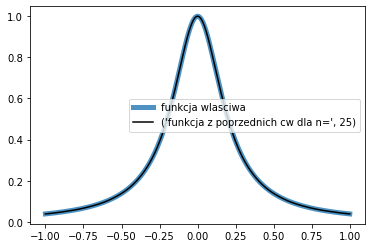

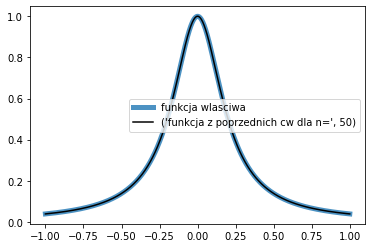

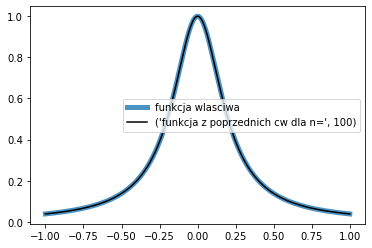

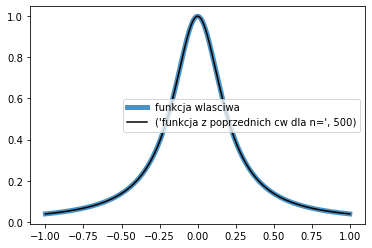

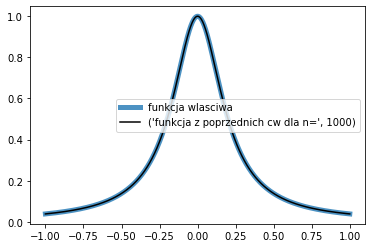

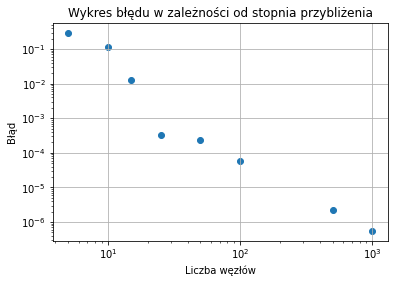

In [4]:
#Interpolacja z poprzednich ćwiczeń main.barycentric_inte
#-------------------------------------------
wezly = ([5, 10, 15, 25, 50, 100, 500, 1000])
f = lambda x: 1/(25*x*x + 1)
X = np.linspace(-1,1,1003)
blad_inter = []

for N in wezly:
    Y = main.barycentric_inte(np.linspace(-1,1,N),f(np.linspace(-1,1,N)),main.bar_czeb_weights(N-1),X)
    blad_inter.append(main.L_inf(Y, f(X)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(X, Y,'black', label = ('funkcja z poprzednich cw dla n=' , N))
    plt.legend()
    plt.show()   

plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


    
  

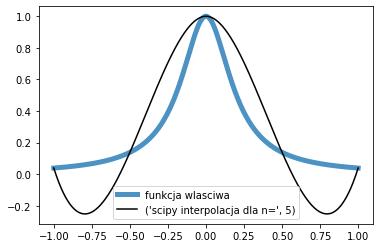

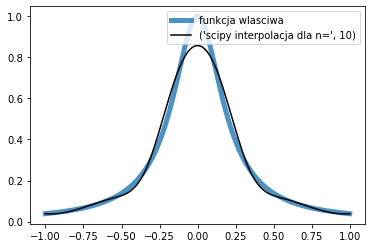

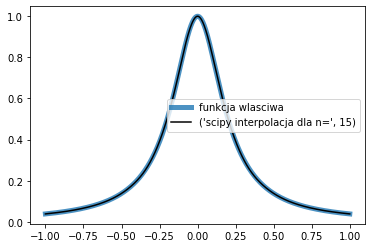

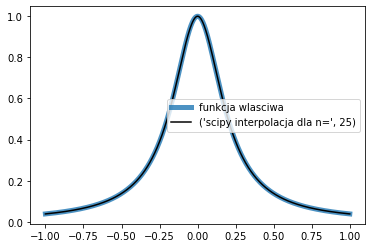

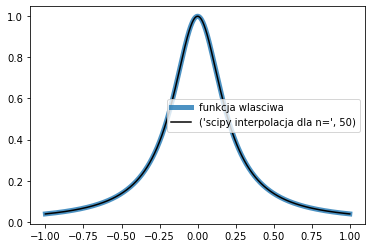

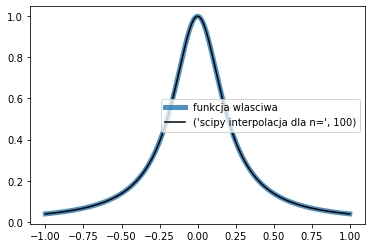

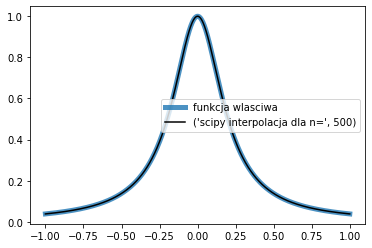

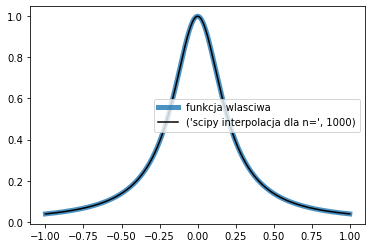

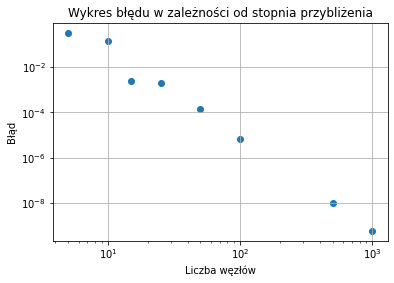

In [5]:
#scipy interpolacja funkcja splrep
wezly = ([5, 10, 15, 25, 50, 100, 500, 1000])
f = lambda x: 1/(25*x*x + 1)
X = np.linspace(-1, 1, 1003)
blad_inter = []

for N in wezly:
    sp = splrep(np.linspace(-1, 1, N), f(np.linspace(-1, 1, N)))
    Y = splev(X, sp)
    blad_inter.append(main.L_inf(Y, f(X)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(X, Y,'black', label = ('scipy interpolacja dla n=' , N))
    plt.legend()
    plt.show()  
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


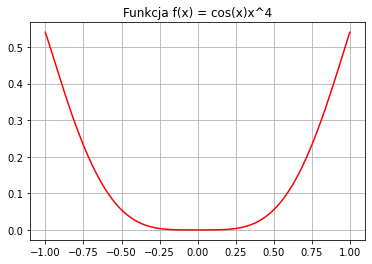

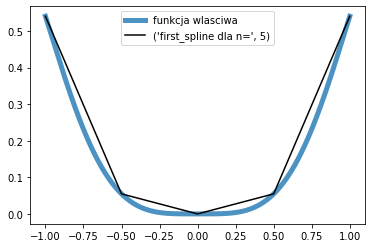

Maksymalny błąd interpolacji dla n=5(first_spline):<function L_inf at 0x0000019FE31161F0>.


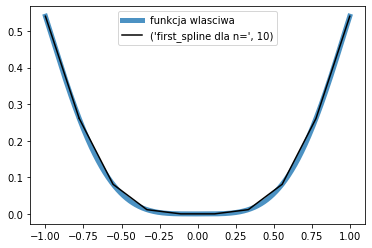

Maksymalny błąd interpolacji dla n=10(first_spline):<function L_inf at 0x0000019FE31161F0>.


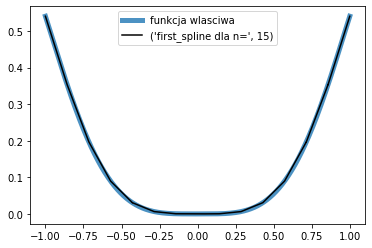

Maksymalny błąd interpolacji dla n=15(first_spline):<function L_inf at 0x0000019FE31161F0>.


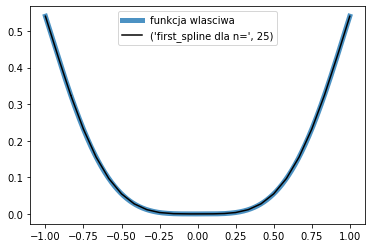

Maksymalny błąd interpolacji dla n=25(first_spline):<function L_inf at 0x0000019FE31161F0>.


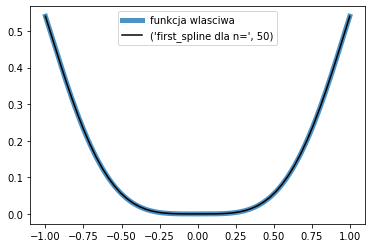

Maksymalny błąd interpolacji dla n=50(first_spline):<function L_inf at 0x0000019FE31161F0>.


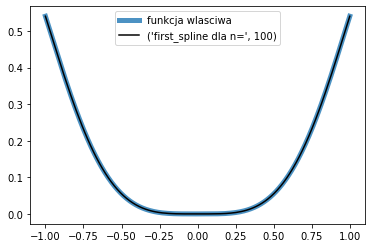

Maksymalny błąd interpolacji dla n=100(first_spline):<function L_inf at 0x0000019FE31161F0>.


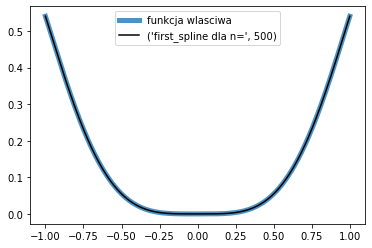

Maksymalny błąd interpolacji dla n=500(first_spline):<function L_inf at 0x0000019FE31161F0>.


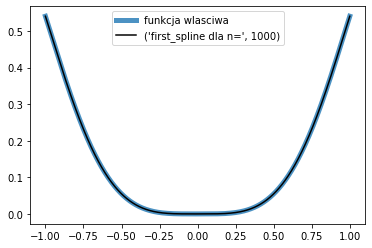

Maksymalny błąd interpolacji dla n=1000(first_spline):<function L_inf at 0x0000019FE31161F0>.


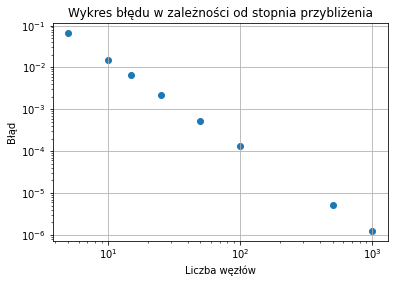

In [6]:
x = np.linspace(-1, 1, 10000)
f = lambda x: np.cos(x)*x**4
y = f(x)
plt.plot(x, y,"r")
plt.grid()
plt.title("Funkcja f(x) = cos(x)x^4")
plt.show()
#Interpolacja z użyciem funkcji first_spline
#----------------------------------------------
wezly = ([5, 10, 15, 25, 50, 100, 500, 1000])
blad_inter = []
f = lambda x : np.cos(x)*x**4
for n in wezly:
    x = np.linspace(-1, 1, n)
    x1=np.linspace(-1,1,1000)
    a,b = main.first_spline(x, f(x))
    f1 = [[b[i],a[i]] for i in range(len(a))]
    x_a = y_a = np.array([])
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f1[i])
        y_a = np.append(y_a, y_new)
        x_a = np.append(x_a, x_new)
    blad_inter.append(main.L_inf(y_a, f(x_a)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(x_a, y_a,'black', label = ('first_spline dla n=' , n))
    plt.legend()
    plt.show() 
    print("Maksymalny błąd interpolacji dla n={b}(first_spline):{a}.".format(a=main.L_inf,b=n))
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()  

  

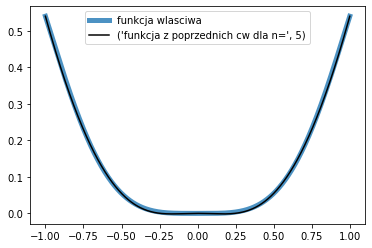

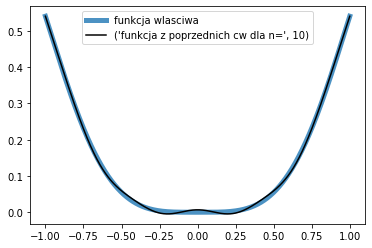

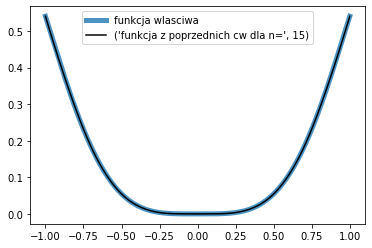

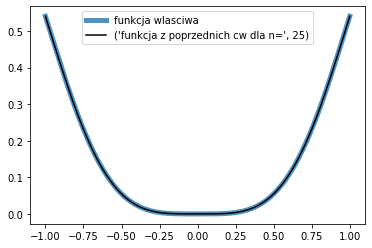

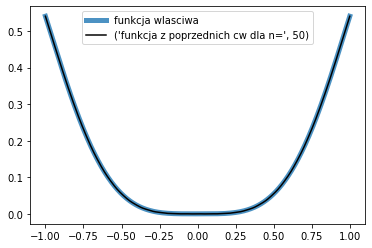

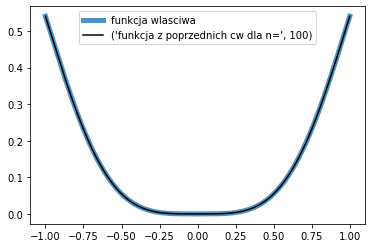

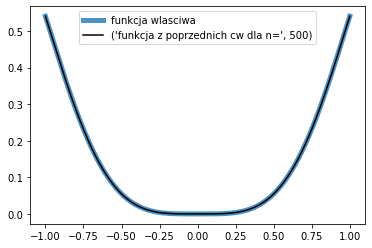

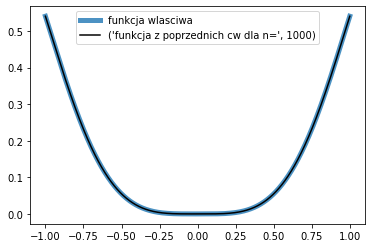

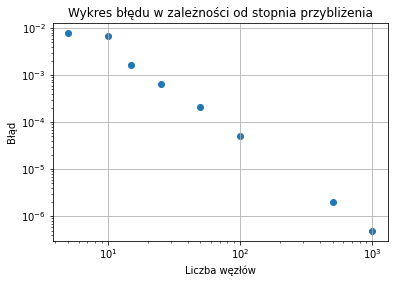

In [7]:
#interpolacja za pomocą funkcji interpolacji barycentrycznej z węzłami równoodległymi
#Interpolacja z poprzednich ćwiczeń main.barycentric_inte
#-------------------------------------------
wezly = ([5, 10, 15, 25, 50, 100, 500, 1000])
f = lambda x: np.cos(x)*x**4
X = np.linspace(-1,1,1003)
blad_inter = []

for N in wezly:
    Y = main.barycentric_inte(np.linspace(-1,1,N),f(np.linspace(-1,1,N)),main.bar_czeb_weights(N-1),X)
    blad_inter.append(main.L_inf(Y, f(X)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(X, Y,'black', label = ('funkcja z poprzednich cw dla n=' , N))
    plt.legend()
    plt.show()   

plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


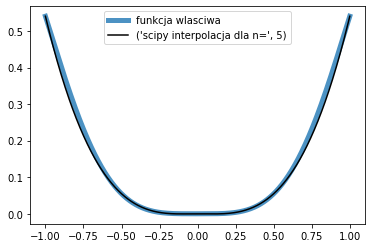

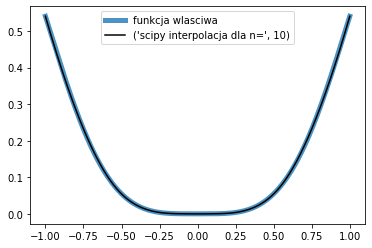

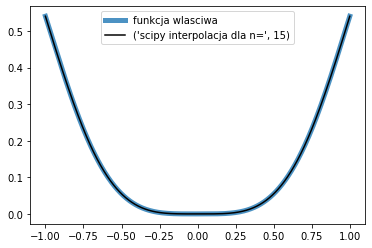

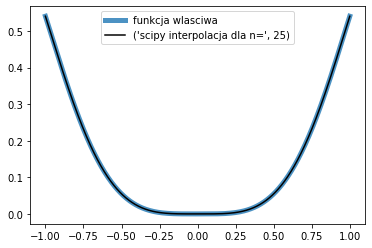

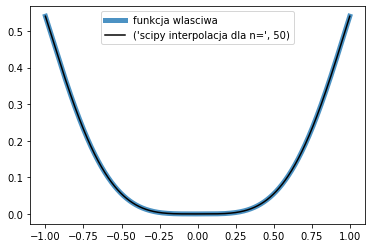

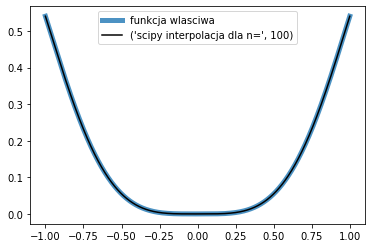

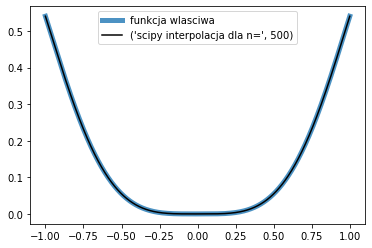

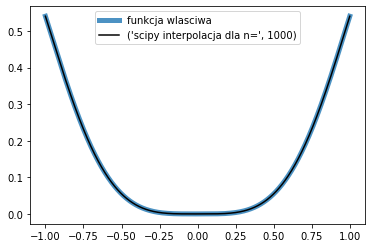

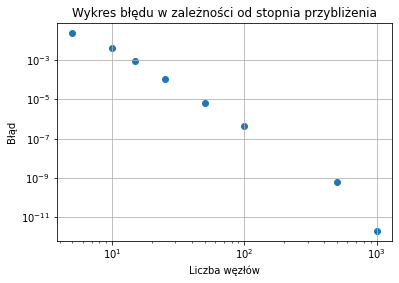

In [8]:
#scipy interpolacja funkcja splrep
wezly = ([5, 10, 15, 25, 50, 100, 500, 1000])
f = lambda x: np.cos(x)*x**4
X = np.linspace(-1, 1, 1003)
blad_inter = []

for N in wezly:
    sp = splrep(np.linspace(-1, 1, N), f(np.linspace(-1, 1, N)))
    Y = splev(X, sp)
    blad_inter.append(main.L_inf(Y, f(X)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(X, Y,'black', label = ('scipy interpolacja dla n=' , N))
    plt.legend()
    plt.show()  
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



Jacobi Method Output:
Number of Iterations:  2
Norm of Difference:  0.0


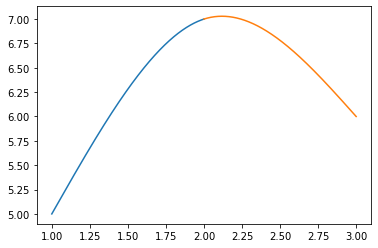

In [9]:
# definicja funkcji i przykład
def PolyCoefficients2(x, coeffs,x0):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x - x0)**i
    return y

x=np.array([1,2,3])
y=np.array([5,7,6])


b,c,d = main.cubic_spline(x,y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients2(x_new, f[i],x[i]))
plt.show()

***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


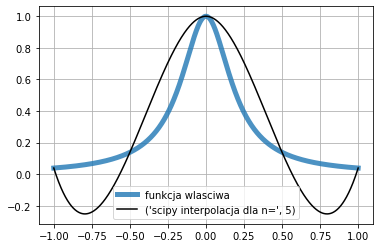

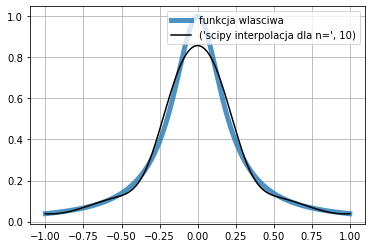

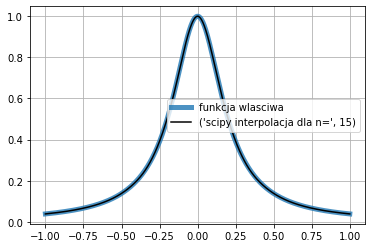

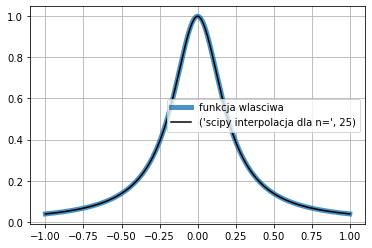

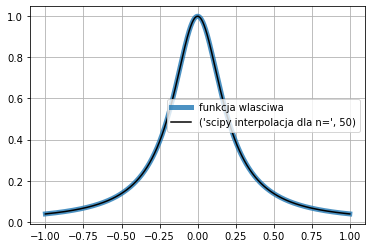

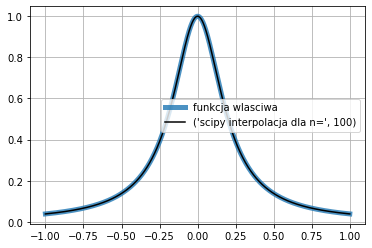

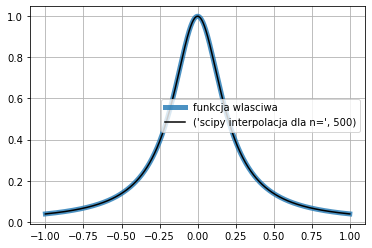

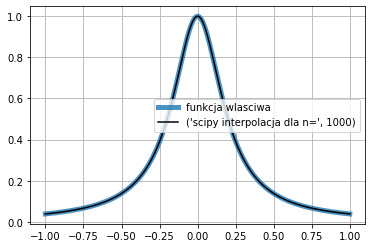

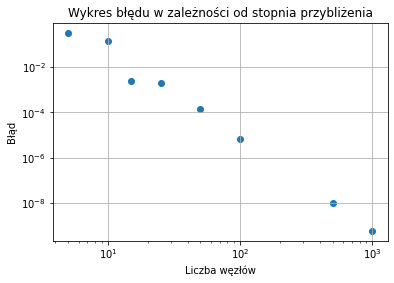

In [10]:
#Interpolacja z użyciem funkcji SPLPREP
#---------------------------------------
wezly = ([5, 10, 15, 25, 50, 100, 500, 1000])
f = lambda x: 1/(25*x**2+1)
X = np.linspace(-1, 1, 1003)
blad_inter = []

for N in wezly:
    sp = splrep(np.linspace(-1, 1, N), f(np.linspace(-1, 1, N)))
    Y = splev(X, sp)
    blad_inter.append(main.L_inf(Y, f(X)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(X, Y,'black', label = ('scipy interpolacja dla n=' , N))
    plt.legend()
    plt.grid()
    plt.show()  
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()
    

Jacobi Method Output:
Number of Iterations:  2
Norm of Difference:  0.0


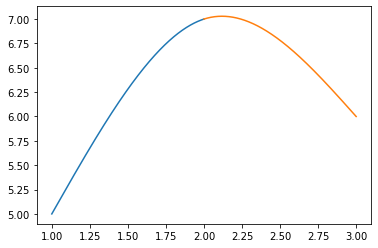

Jacobi Method Output:
Number of Iterations:  37
Norm of Difference:  0.0


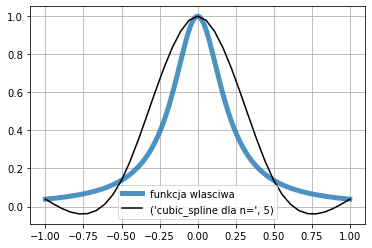

Jacobi Method Output:
Number of Iterations:  50
Norm of Difference:  0.0


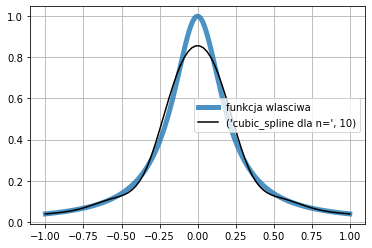

Jacobi Method Output:
Number of Iterations:  55
Norm of Difference:  0.0


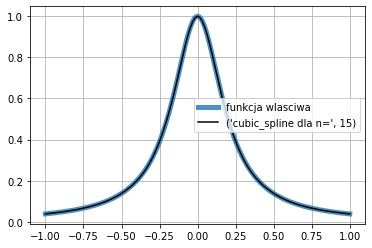

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.538370149106851e-15


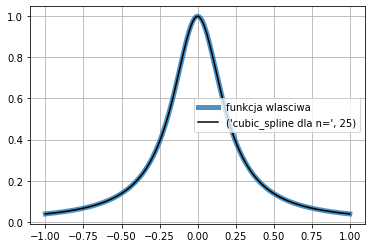

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  4.2245955556298684e-15


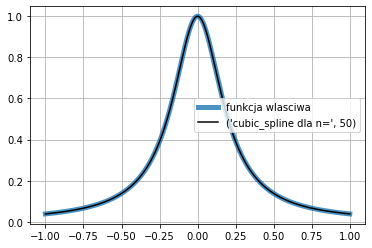

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  2.8524846763913026e-15


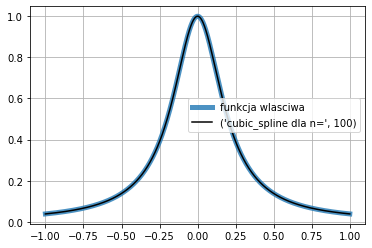

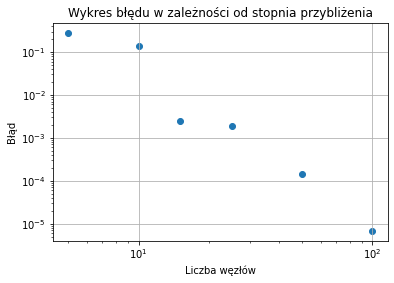

In [11]:
# definicja funkcji i przykład
def PolyCoefficients2(x, coeffs,x0):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x - x0)**i
    return y

x=np.array([1,2,3])
y=np.array([5,7,6])


b,c,d = main.cubic_spline(x,y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients2(x_new, f[i],x[i]))
plt.show()
#cubic spline
wezly = ([5, 10, 15, 25, 50, 100])
blad_inter = []
f = lambda x: 1/(25*x**2+1)
for n in wezly:
    x = np.linspace(-1, 1, n)
    x1=np.linspace(-1,1,1000)
    y = f(x)
    a,b,c = main.cubic_spline(x, y)
    fun = [[y[i],a[i],b[i],c[i]] for i in range(len(a))]
    x_a = y_a = np.array([])
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients2(x_new, fun[i],x[i])
        y_a = np.append(y_a, y_new)
        x_a = np.append(x_a, x_new)
    blad_inter.append(main.L_inf(y_a, f(x_a)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(x_a, y_a,'black', label = ('cubic_spline dla n=' , n))
    plt.legend()
    plt.grid()
    plt.show()   
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()  

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jacobi Method Output:
Number of Iterations:  2
Norm of Difference:  0.0


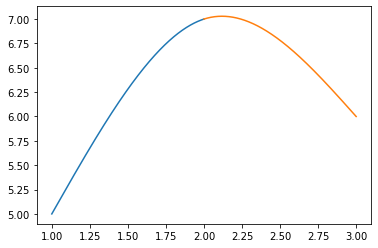

Jacobi Method Output:
Number of Iterations:  39
Norm of Difference:  0.0


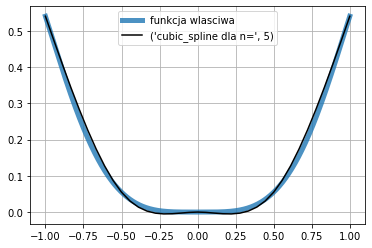

Jacobi Method Output:
Number of Iterations:  52
Norm of Difference:  0.0


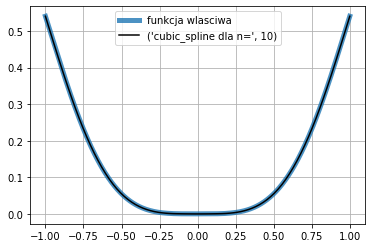

Jacobi Method Output:
Number of Iterations:  57
Norm of Difference:  0.0


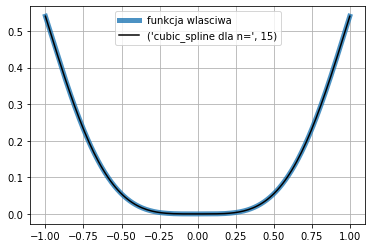

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  3.141059252046941e-16


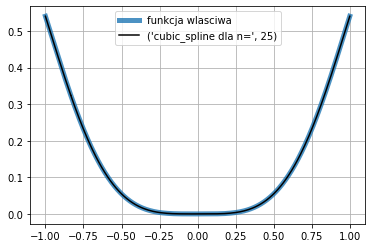

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  9.387853869717605e-16


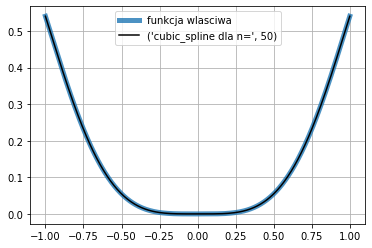

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  4.873554251175992e-16


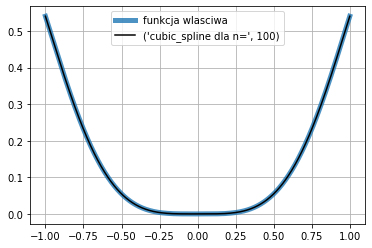

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  2.0042836192144827e-15


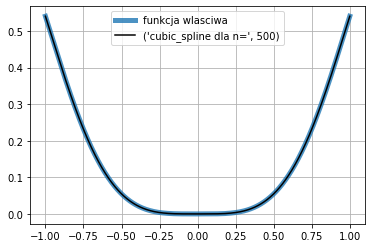

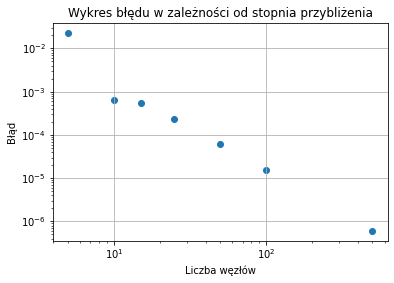

In [12]:

#Interpolacja funkcją zaimplementowaną w zadaniu 4

# definicja funkcji i przykład
def PolyCoefficients2(x, coeffs,x0):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x - x0)**i
    return y

x=np.array([1,2,3])
y=np.array([5,7,6])


b,c,d = main.cubic_spline(x,y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients2(x_new, f[i],x[i]))
plt.show()
wezly = ([5, 10, 15, 25, 50, 100,500])
blad_inter = []
f = lambda x: np.cos(x)*x**4
for n in wezly:
    x = np.linspace(-1, 1, n)
    x1=np.linspace(-1,1,1000)
    y = f(x)
    a,b,c = main.cubic_spline(x, y)
    fun = [[y[i],a[i],b[i],c[i]] for i in range(len(a))]
    x_a = y_a = np.array([])
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients2(x_new, fun[i],x[i])
        y_a = np.append(y_a, y_new)
        x_a = np.append(x_a, x_new)
    blad_inter.append(main.L_inf(y_a, f(x_a)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(x_a, y_a,'black', label = ('cubic_spline dla n=' , n))
    plt.legend()
    plt.grid()
    plt.show()   
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show() 

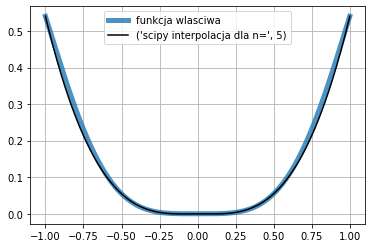

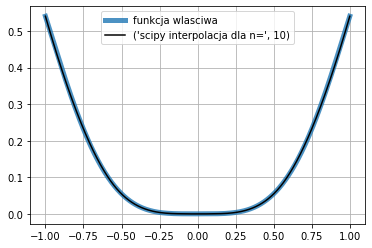

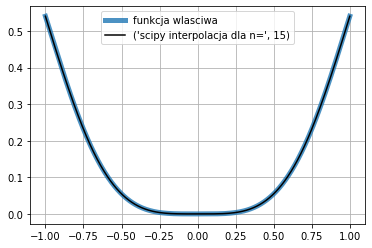

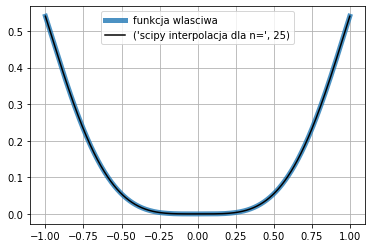

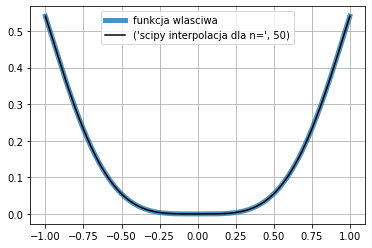

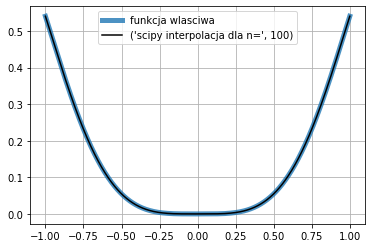

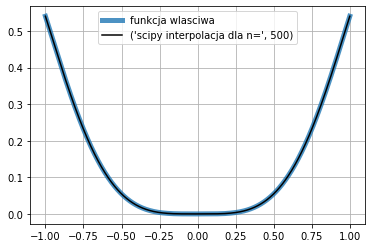

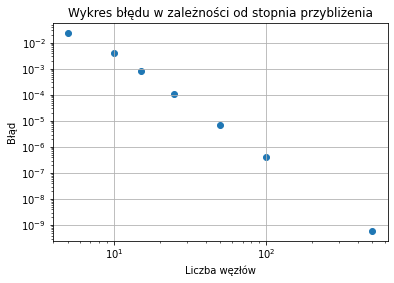

In [13]:
#Interpolacja z użyciem funkcji SPLPREP
#---------------------------------------
wezly = ([5, 10, 15, 25, 50, 100, 500])
f = lambda x: np.cos(x)*x**4
X = np.linspace(-1, 1, 1003)
blad_inter = []

for N in wezly:
    sp = splrep(np.linspace(-1, 1, N), f(np.linspace(-1, 1, N)))
    Y = splev(X, sp)
    blad_inter.append(main.L_inf(Y, f(X)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(X, Y,'black', label = ('scipy interpolacja dla n=' , N))
    plt.legend()
    plt.grid()
    plt.show()  
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()
    

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

Jacobi Method Output:
Number of Iterations:  2
Norm of Difference:  0.0


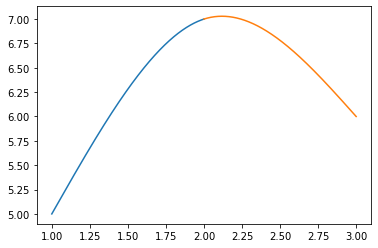

Jacobi Method Output:
Number of Iterations:  39
Norm of Difference:  0.0


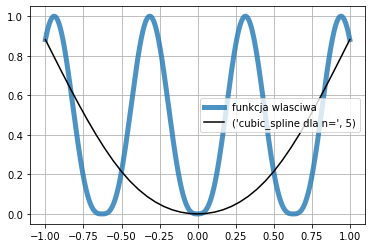

Jacobi Method Output:
Number of Iterations:  47
Norm of Difference:  0.0


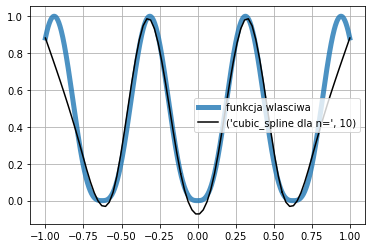

Jacobi Method Output:
Number of Iterations:  56
Norm of Difference:  0.0


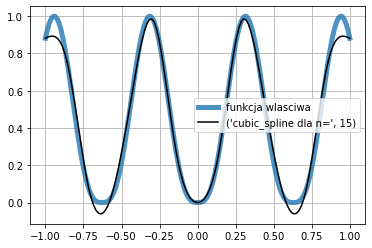

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  7.588599744428075e-15


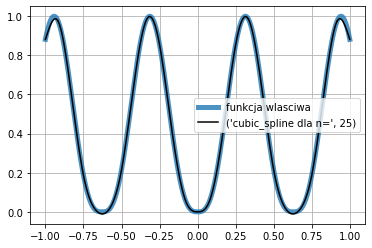

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  9.907924120689998e-15


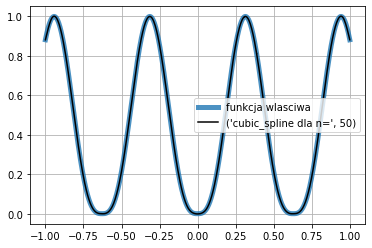

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.3102513289393096e-14


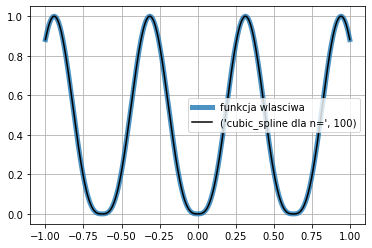

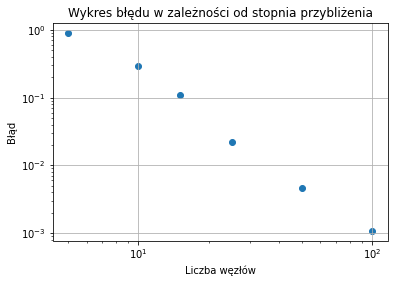

In [14]:
# definicja funkcji i przykład
def PolyCoefficients2(x, coeffs,x0):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x - x0)**i
    return y

x=np.array([1,2,3])
y=np.array([5,7,6])


b,c,d = main.cubic_spline(x,y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients2(x_new, f[i],x[i]))
plt.show()
#Interpolacja funkcją zaimplementowaną z zadania 4
wezly = ([5, 10, 15, 25, 50, 100])
blad_inter = []
f = lambda x: abs(np.sin(5*x)**3)
for n in wezly:
    x = np.linspace(-1, 1, n)
    x1=np.linspace(-1,1,1000)
    y = f(x)
    a,b,c = main.cubic_spline(x, y)
    fun = [[y[i],a[i],b[i],c[i]] for i in range(len(a))]
    x_a = y_a = np.array([])
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients2(x_new, fun[i],x[i])
        y_a = np.append(y_a, y_new)
        x_a = np.append(x_a, x_new)
    blad_inter.append(main.L_inf(y_a, f(x_a)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(x_a, y_a,'black', label = ('cubic_spline dla n=' , n))
    plt.legend()
    plt.grid()
    plt.show()   
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()  

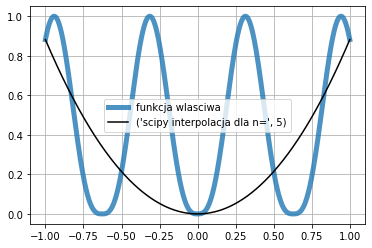

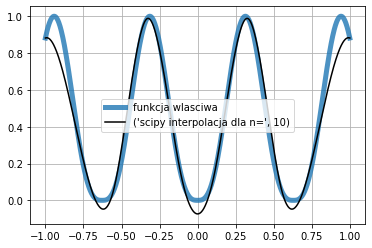

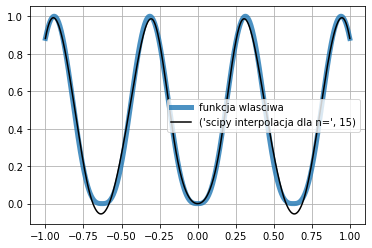

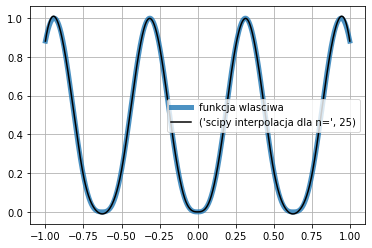

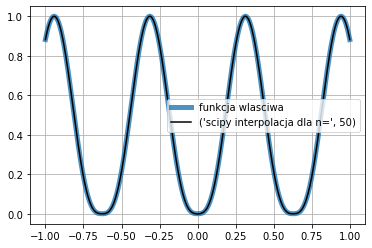

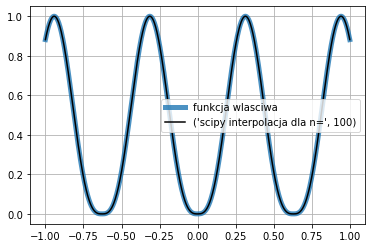

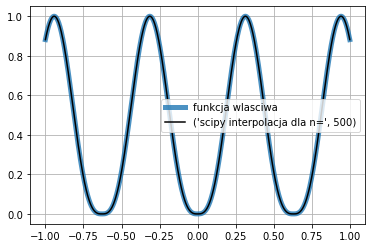

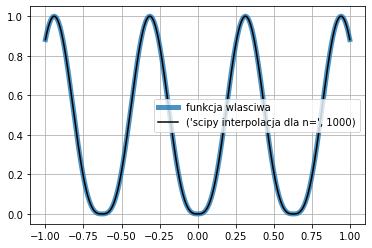

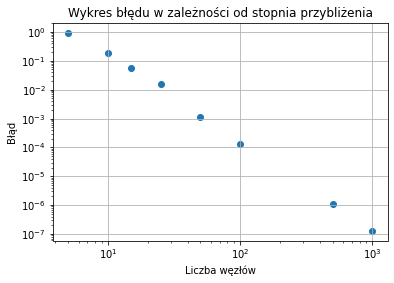

In [15]:
#Interpolacja z użyciem funkcji SPLPREP
#---------------------------------------
wezly = ([5, 10, 15, 25, 50, 100,500,1000])
f = lambda x: abs(np.sin(5*x)**3)
X = np.linspace(-1, 1, 1003)
blad_inter = []

for N in wezly:
    sp = splrep(np.linspace(-1, 1, N), f(np.linspace(-1, 1, N)))
    Y = splev(X, sp)
    blad_inter.append(main.L_inf(Y, f(X)))
    plt.plot(x1, f(x1), linewidth = 5, alpha = 0.8, label = 'funkcja wlasciwa')
    plt.plot(X, Y,'black', label = ('scipy interpolacja dla n=' , N))
    plt.legend()
    plt.grid()
    plt.show()  
plt.scatter(wezly, blad_inter)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

**Wnioski**
Na poprzednich laboratoriach posługiwaliśmy się wielomianowymi metodami interpolacji. Czasami może się zdarzyć że charakter interpolowanej funkcji uniemożliwia dobre odwzorowanie za pomocą wielomianu interpolowanej funkcji. Na dzisiejszych laboratoriach zapoznałem się z metodą interpolacji za pomocą funkcji sklejanych. Ważną zaletą jest jej prostota oraz to, że możemy otrzymać całkiem dobre przybliżenie.  
W pierwszym zadaniu musieliśmy zaimplementować funkcje sklejaną pierwszego rzędu, która nie była dość skomplikowana. Jeżeli chodzi o zadanie 2 musieliśmy skorzystać z wbudowanej funkcji pakietu scipy.interpolate, funkcji zaimplementowanej w zadaniu 1 oraz interpolacji barycentycznej. Okazało się, że najlepsze wyniki daje funkcja z pakietu scipy, która posiadała największy błąd rzędu 10^-2. Najgorsza w naszym zestawieniu była funkcja sklejana 1 stopnia, posiadając błąd rzędu 10^-1. Interpolacja wielomianowa posiadała błąd rzędu 10^-1. Kolejne zadanie było takie samo tylko mieliśmy funkcję 1/(25x^2+1). Jeżeli chodzi o błędy obliczeń to najgorzej wypada funkcja sklejana 1 stopnia. Na drugim miejscu plasuje się interpolacja wielomianowa z takim samym błędem rzędu, co funkcja sklejana, lecz szybciej się zmniejsza wraz ze wzrostem węzłów. Dla funkcji z 3 zadania(cos(x)^4) funkcja sklejana pierwszego rzędu(błąd rzędu 10^-1), interpolacja wielomianowa(błąd rzędu 10^-2), natomiast funkcja z pakietu scipy(błąd rzędu 10^-3). Najtrudniejszym momentem w ćwiczeniu 4 była sama implementacja funkcji splajnu kubicznego. Musiałem zmodyfikować funkcję PoyCoefficients przez dodanie trzeciego parametru x0. W zadaniu 5 dla funkcji 1/(25x^2+1) skuteczniejsza okazał się być funkcja z pakietu scipy od spaljnu kubicznego. W przypadku splajnu kubicznego błąd był około dwa razy większy. Dla funkcji z zadania 6 (cos(x)x^4) najlepiej interpoluje funkcja z pakietu scipy, gorzej wypada po raz kolejny splajn kubiczny, która ma wyniki o większym błędzie. Dla funkcji z zadania 7 |sin(5x)|^3 widać, że funkcja z zadania 1 przybliża dokładniej, a błąd jej jest mniejszy niż splajnu kubicznego.  

Zajęcia te pozwoliły mi również przećwiczyć rysowanie wykresów w pythonie przy pomocy biblioteki matplotlib.pyplot. Powtórzyłem również posługiwanie się biblioteką numpy oraz scipy.
